# RDKitを使った分子構造可視化

In [12]:
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

## IbuprofenからMorgan fingerprintを取り出す

In [13]:
ibuprofen = Chem.MolFromSmiles('CC(C)CC1=CC=C(C=C1)C(C)C(=O)O')

bi = {}
fp = rdMolDescriptors.GetMorganFingerprintAsBitVect(ibuprofen,
                                                    radius=2,
                                                    bitInfo=bi)
print(list(fp.GetOnBits()))

[1, 79, 80, 283, 310, 389, 650, 807, 854, 857, 900, 921, 955, 1057, 1146, 1257, 1365, 1380, 1750, 1754, 1844, 1847, 1853, 1873, 1917]


## Morgan fingerprintを色付けして表示

RDKit 2019.09 以上のバージョンでは、`Draw.DrawMorganBit`を利用しましょう

ID: 854の以下の例では、ibuprofenの左端が取得されています。

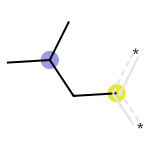

In [14]:
#図1.6(a)　Morganフィンガープリントのid854
Draw.DrawMorganBit(ibuprofen, 854,bi)

In [15]:
list(bi.items())[:10]

[(1, ((1, 0), (10, 0))),
 (79, ((3, 1),)),
 (80, ((3, 0),)),
 (283, ((0, 1), (2, 1), (11, 1))),
 (310, ((5, 2), (9, 2))),
 (389, ((14, 1),)),
 (650, ((13, 0),)),
 (807, ((12, 0), (14, 0))),
 (854, ((1, 2),)),
 (857, ((4, 2),))]

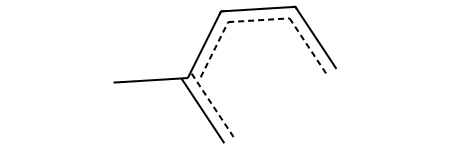

In [16]:
atom_id, radius = bi[310][0]
path_ids = Chem.FindAtomEnvironmentOfRadiusN(ibuprofen, radius, atom_id)
substructure = Chem.PathToSubmol(ibuprofen, path_ids)
substructure

## Morgan fingerprintが分子の中のどこを指しているか確認する

`Mol.GetSubstructMatch`を利用する

substructure cccc(c)C


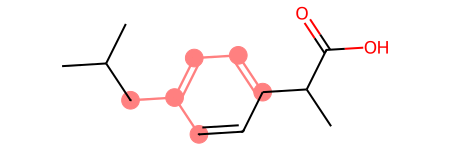

In [17]:
print('substructure', Chem.MolToSmiles(substructure))
ibuprofen.GetSubstructMatch(substructure)
ibuprofen

`bi`変数には、`(atom_index, radius)`が格納されている

In [18]:
atom_index, radius = bi[854][0]
print('atom_index', atom_index, 'radius', radius)

atom_index 1 radius 2


## RDKit fingerprintの取得と可視化

In [19]:
from pprint import pprint 

In [20]:
rdkbi = {}
rdkfp = Chem.RDKFingerprint(ibuprofen, maxPath=5, bitInfo=rdkbi)
pprint(list(rdkbi.items())[:10])
list(rdkfp.GetOnBits())[:10]

[(19, [[0, 2, 3, 14, 1], [0, 2, 3, 4, 1]]),
 (103,
  [[4, 5, 6, 7],
   [4, 5, 6, 14],
   [4, 5, 14, 8],
   [4, 14, 8, 7],
   [5, 6, 7, 8],
   [6, 7, 8, 14]]),
 (105, [[5, 6, 9, 11, 13], [7, 8, 9, 11, 13]]),
 (110, [[9, 11, 12, 10]]),
 (161, [[4, 5, 6], [4, 5, 14], [4, 14, 8], [5, 6, 7], [6, 7, 8], [7, 8, 14]]),
 (173, [[0, 2, 1]]),
 (194,
  [[4, 5, 6, 7],
   [4, 5, 6, 14],
   [4, 5, 14, 8],
   [4, 14, 8, 7],
   [5, 6, 7, 8],
   [6, 7, 8, 14]]),
 (254, [[9, 11, 13]]),
 (261, [[9, 11, 12]]),
 (294, [[4, 5], [4, 14], [5, 6], [6, 7], [7, 8], [8, 14]])]


[19, 103, 105, 110, 161, 173, 194, 254, 261, 294]

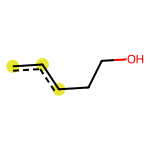

In [21]:
Draw.DrawRDKitBit(ibuprofen, 105, rdkbi)

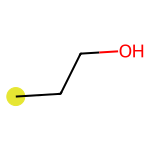

In [22]:
Draw.DrawRDKitBit(ibuprofen, 254, rdkbi)

- Morgan fingerprintは、原子から同心円状に結合をたどって行きます。
- 一方でRDKit fingerprintでは、直線的な部分構造を取り出すようです。
- `rdkbi`では、部分構造に含まれる結合のidが取り出されています。

In [23]:
epinephrine = Chem.MolFromSmiles('CNC[C@H](O)c1ccc(O)c(O)c1')

## 分子をまとめて表示

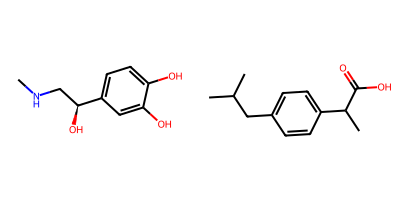

In [24]:
Draw.MolsToGridImage([epinephrine,
                     ibuprofen], molsPerRow=2)

### 図の保存

In [25]:
img = Draw.MolsToGridImage([epinephrine,
                     ibuprofen], molsPerRow=2)
img.save('./molecules.jpg')

AttributeError: 'Image' object has no attribute 'save'